In [811]:
import pandas as pd
import numpy as np
import missingno as msno
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from category_encoders import CatBoostEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [812]:
flight_df = pd.read_csv("updated_flight_df.csv")

In [813]:
flight_df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,...,Airplane1,Airplane2,Airplane3,Airplane4,Dist1,Dist2,Dist3,Dist4,num_flight,fareDiff
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Airbus A321,NaN,NaN,NaN,947,0,0,0,1,30.93
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Airbus A321,NaN,NaN,NaN,947,0,0,0,1,30.93
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Boeing 757-200,NaN,NaN,NaN,947,0,0,0,1,30.93
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Airbus A321,NaN,NaN,NaN,947,0,0,0,1,30.93
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Airbus A321,NaN,NaN,NaN,947,0,0,0,1,30.93


In [814]:
flight_df.dtypes

legId                         object
searchDate                    object
flightDate                    object
startingAirport               object
destinationAirport            object
fareBasisCode                 object
elapsedDays                  float64
isBasicEconomy                  bool
isRefundable                    bool
isNonStop                       bool
baseFare                     float64
totalFare                    float64
seatsRemaining               float64
totalTravelDistance          float64
DepartureTimeEpochSeconds     object
DepartureTimeRaw              object
ArrivalTimeEpochSeconds       object
ArrivalTimeRaw                object
ArrivalAirportCode            object
DepartureAirportCode          object
AirlineName                   object
AirlineCode                   object
DurationInSeconds             object
Distance                      object
FlightSeat1                   object
FlightSeat2                   object
FlightSeat3                   object
F

<Axes: >

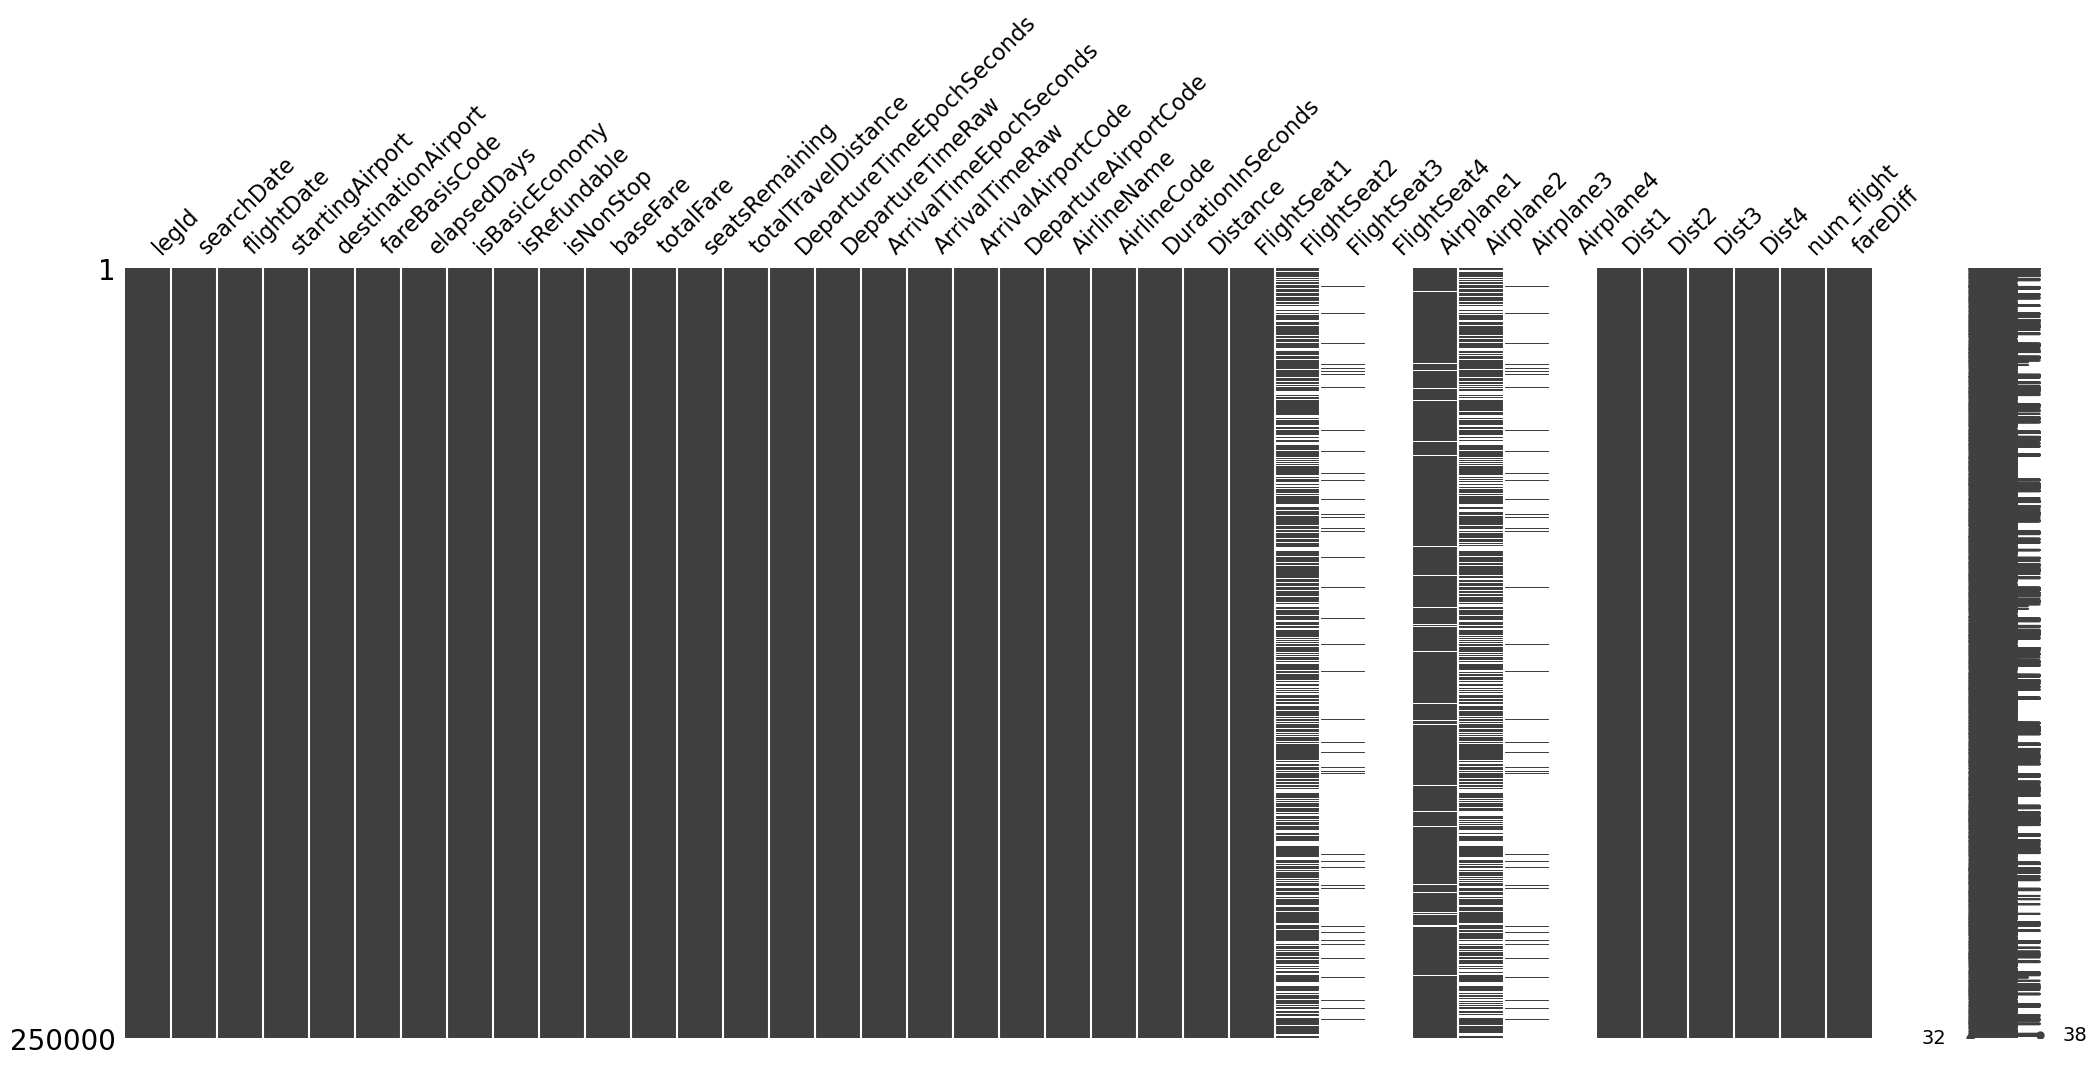

In [815]:
msno.matrix(flight_df)

So during our EDA phase of the data science pipeline the mission values were all filled in; however, when we read in the .csv file now the missing values were all unfilled. I went back to double check and the final output in the EDA project were all grey/black bars without any indication of missing values. Lets have a second look and see what we have.

<Axes: >

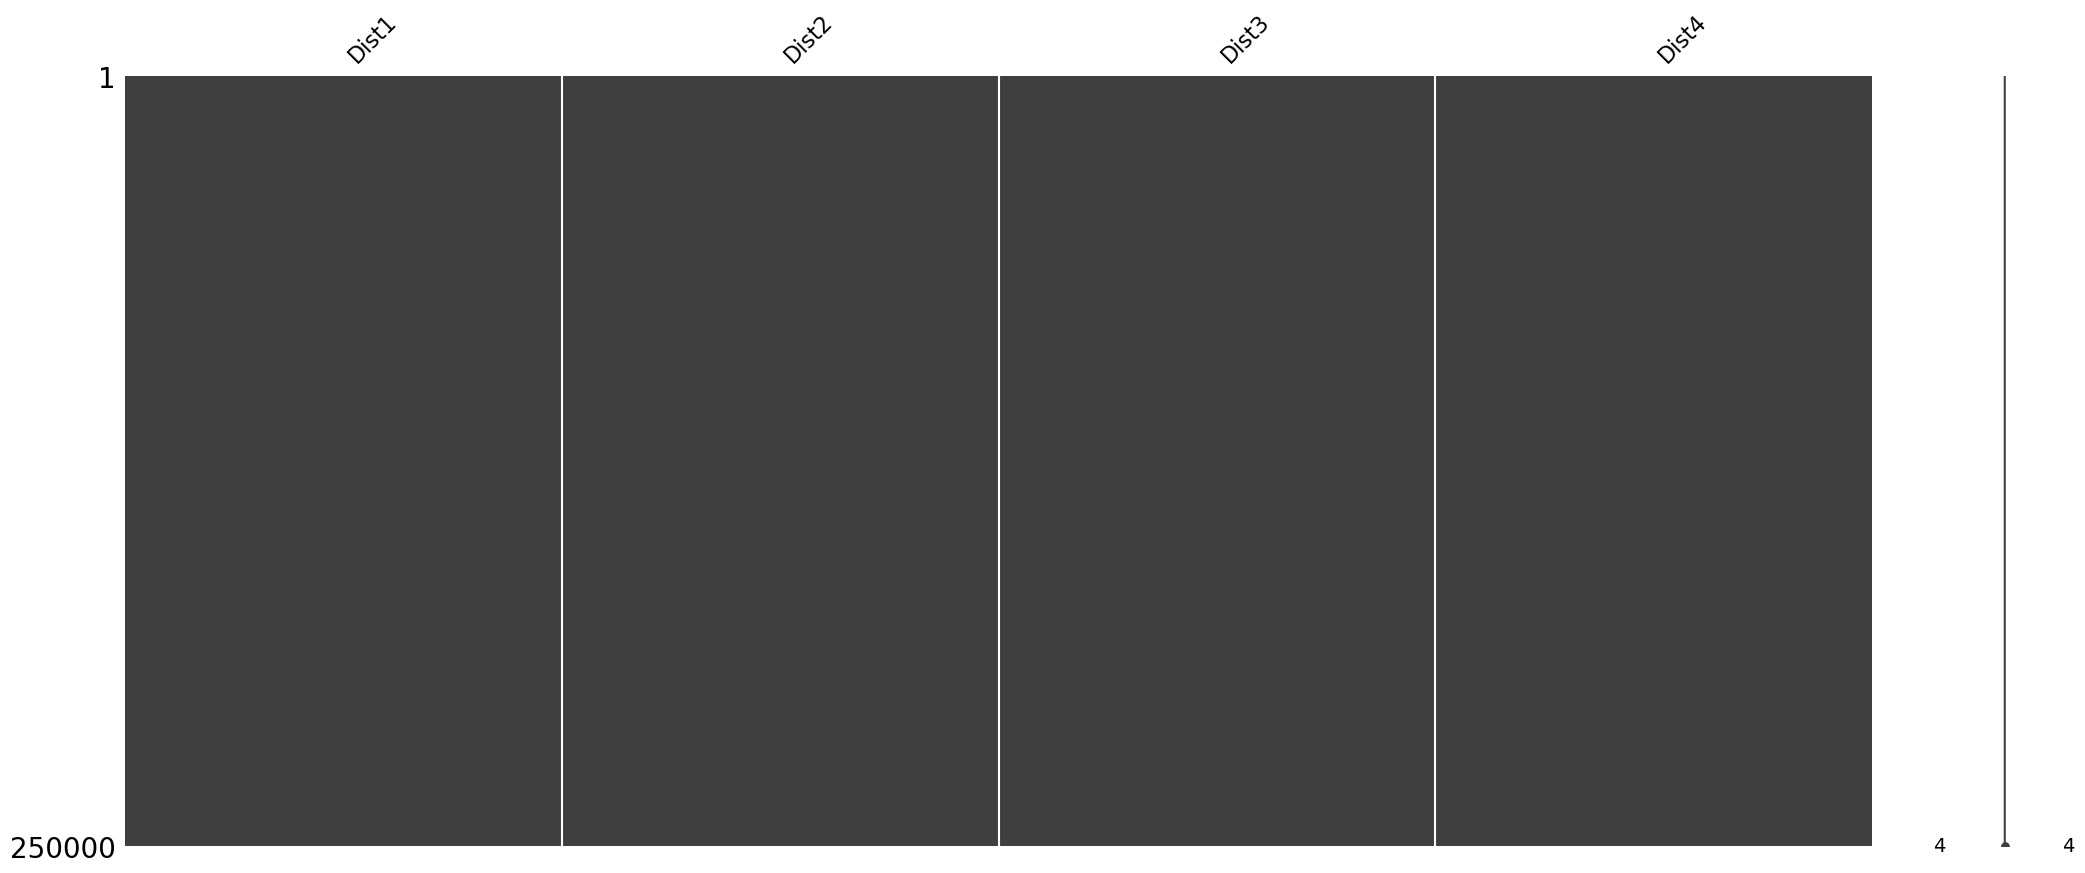

In [816]:
msno.matrix(flight_df[['Dist1', 'Dist2', 'Dist3', 'Dist4']])

<Axes: >

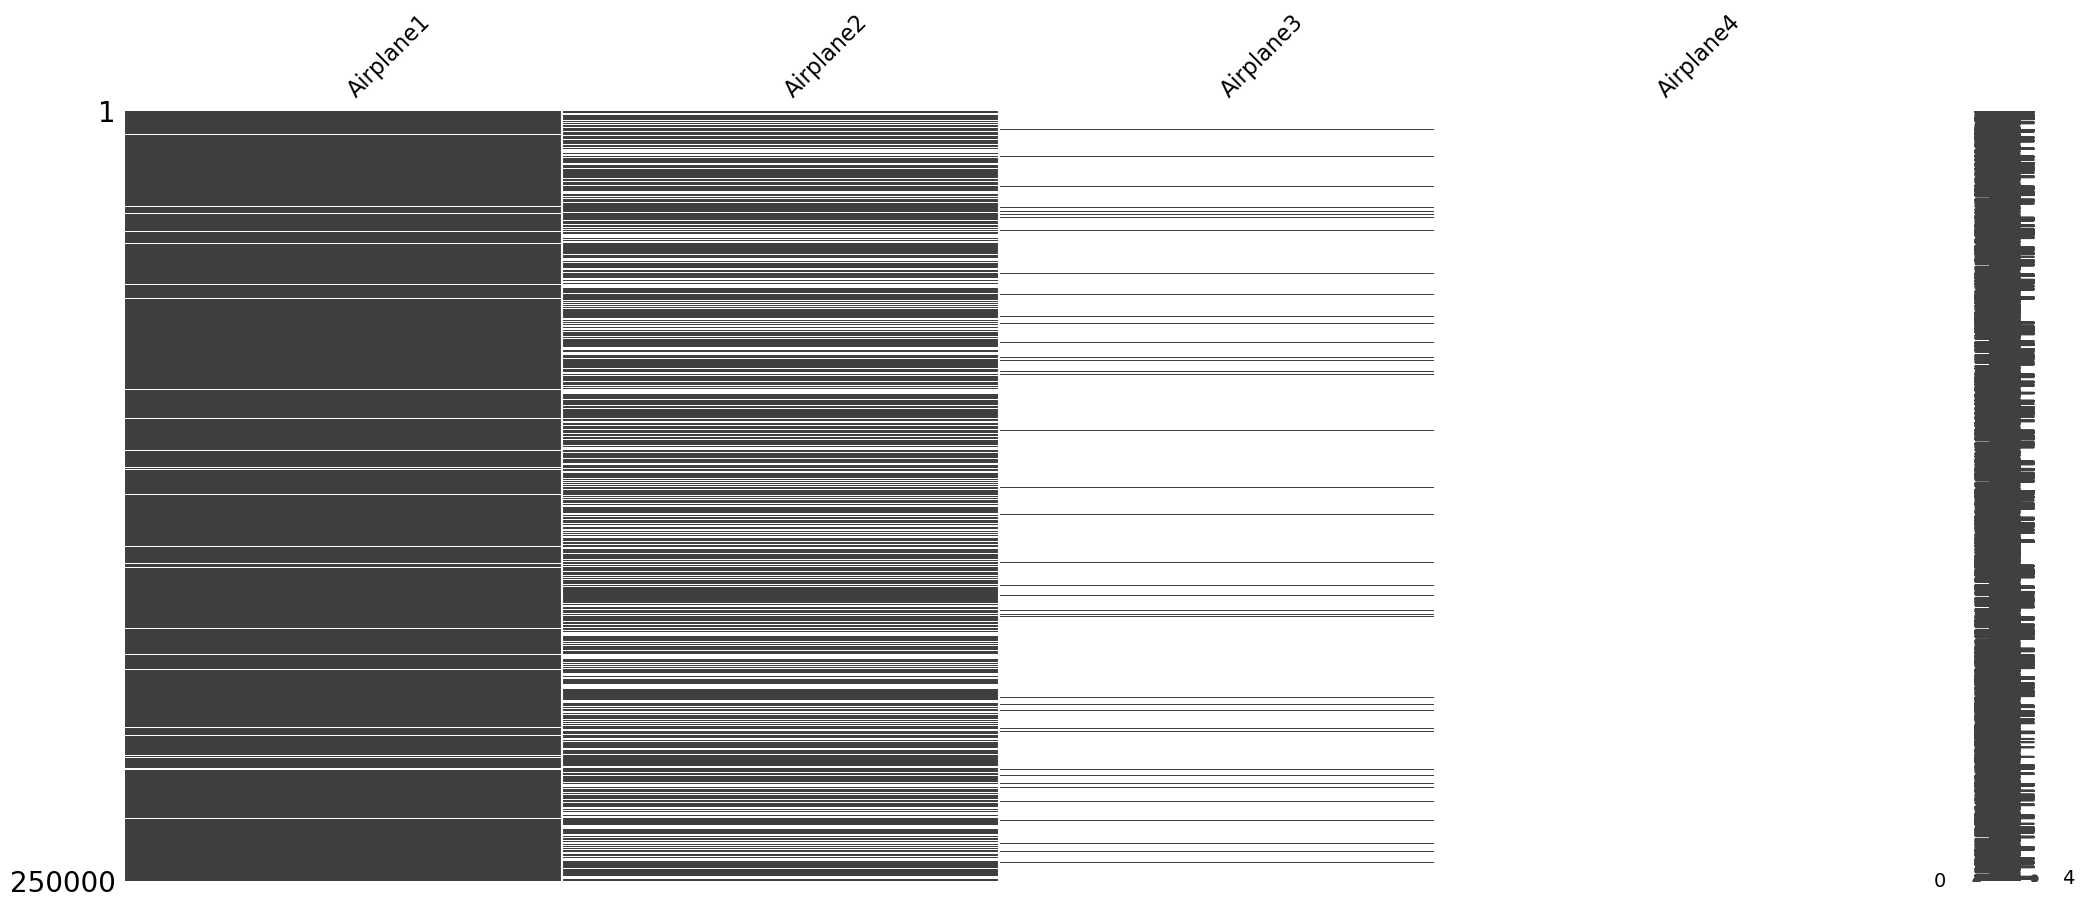

In [817]:
msno.matrix(flight_df[['Airplane1', 'Airplane2', 'Airplane3', 'Airplane4']])

In [818]:
null = flight_df['Airplane1'].isnull()
null_rows = flight_df[null]
null_rows.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,...,Airplane1,Airplane2,Airplane3,Airplane4,Dist1,Dist2,Dist3,Dist4,num_flight,fareDiff
25,912ef0fbca3f88a86af24bdc1c1c6c0a,2022-04-16,2022-04-17,ATL,BOS,YNR,1.0,False,False,False,...,NaN,AIRBUS INDUSTRIE A320 SHARKLETS,NaN,NaN,None,None,0,0,2,107.58
57,a291a2b5ac19223c3407cfec58d1fc24,2022-04-16,2022-04-17,ATL,CLT,VH0AUEL1,0.0,False,False,False,...,NaN,Embraer 190,NaN,NaN,947,728,0,0,2,59.81
92,aa5c91b3ac52f2ee62eaf00f6a7da05e,2022-04-16,2022-04-17,ATL,DEN,YNR,0.0,False,False,False,...,NaN,AIRBUS INDUSTRIE A321 SHARKLETS,NaN,NaN,None,None,0,0,2,107.58
94,115cc839ccfbd02898100fb98c7c2aba,2022-04-16,2022-04-17,ATL,DEN,H01PXP5,0.0,False,False,False,...,NaN,NaN,NaN,NaN,399,1549,0,0,2,60.61
124,eee2ae5e5875b68d3d2af2210db4d18d,2022-04-16,2022-04-17,ATL,DFW,YNR,0.0,False,False,False,...,NaN,AIRBUS INDUSTRIE A321 SHARKLETS,NaN,NaN,None,None,0,0,2,107.58


<Axes: >

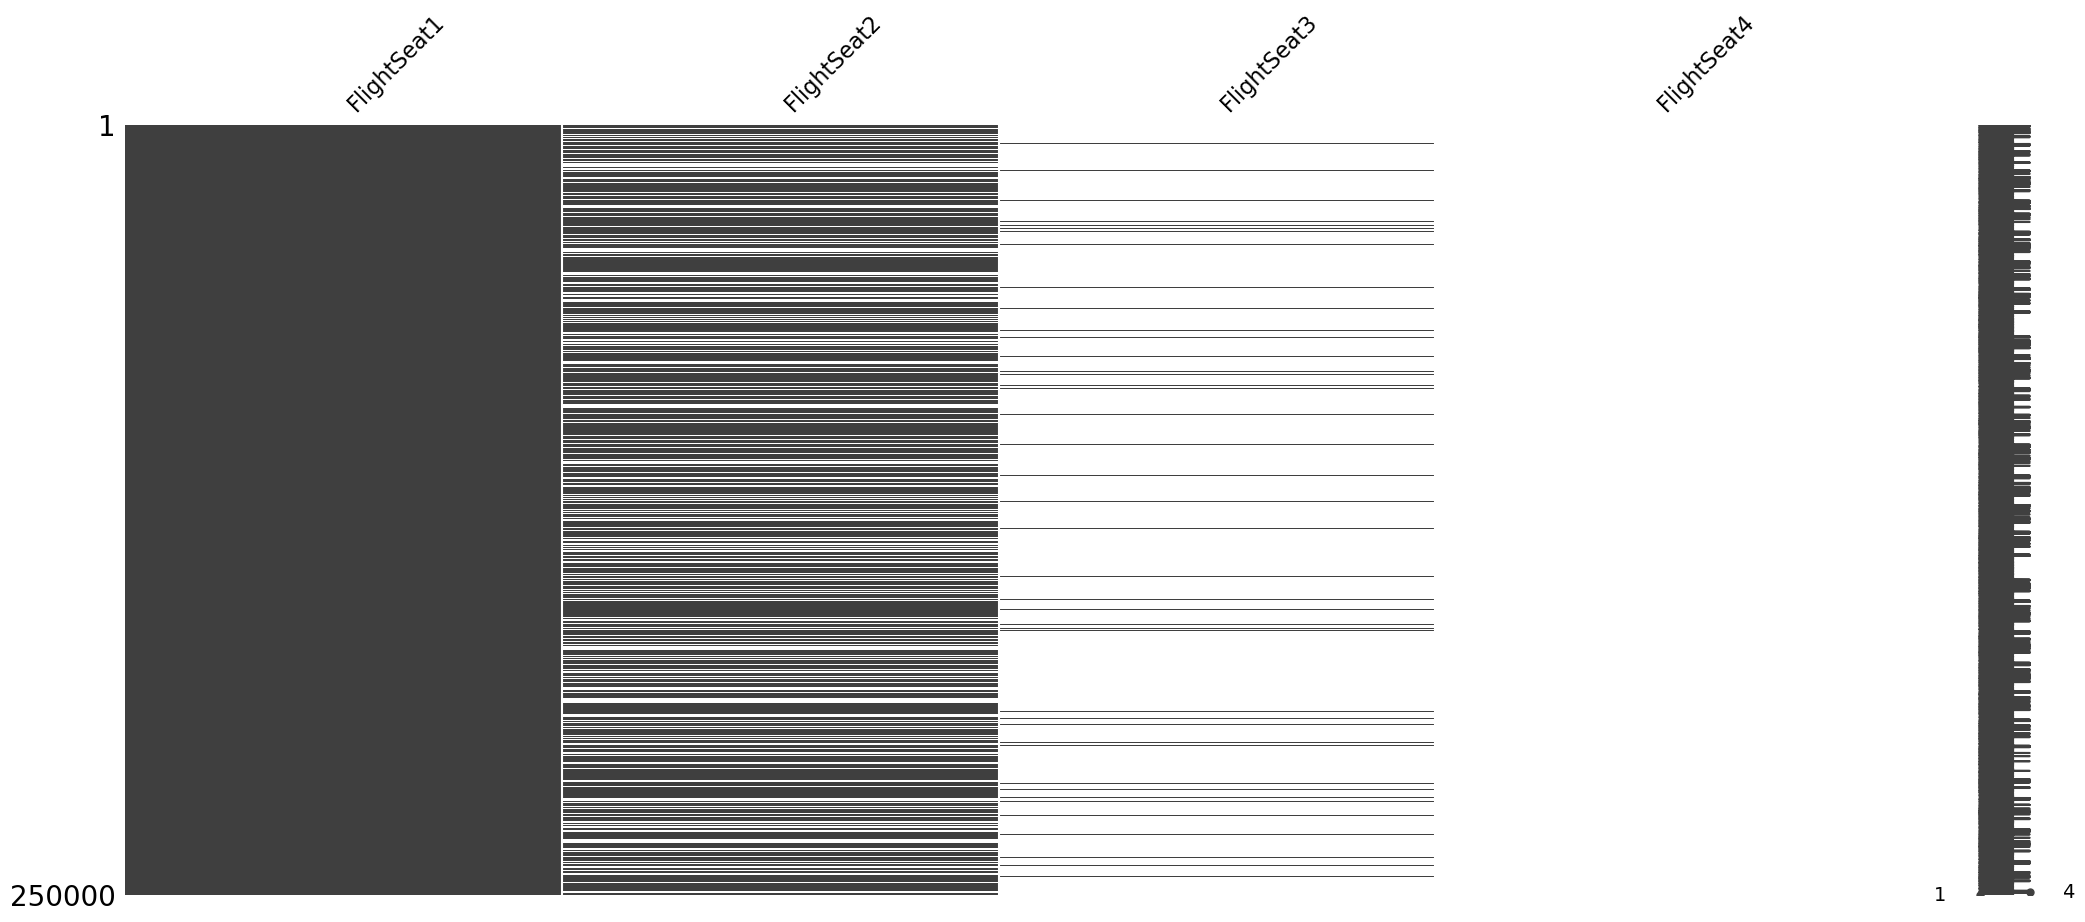

In [819]:
msno.matrix(flight_df[['FlightSeat1', 'FlightSeat2', 'FlightSeat3', 'FlightSeat4']])

In [820]:
flight_df[['FlightSeat1', 'FlightSeat2', 'FlightSeat3', 'FlightSeat4']]

,FlightSeat1,FlightSeat2,FlightSeat3,FlightSeat4
0,coach,NaN,NaN,NaN
1,coach,NaN,NaN,NaN
2,coach,NaN,NaN,NaN
3,coach,NaN,NaN,NaN
4,coach,NaN,NaN,NaN
...,...,...,...,...
249995,coach,coach,NaN,NaN
249996,coach,coach,NaN,NaN
249997,coach,coach,NaN,NaN
249998,coach,NaN,NaN,NaN


So it would see all of the columns with missing values are columns the columns I created, I did feature engineering to spilt up columns with multiple pieces of information. Specifically, I created columns to store information that were all clustered into one column such as the airline models being flow if there were multiple legs of a flight. It would seem I will need to fill in these missing values, the issue is flights with more than a singular layover is low in the continental USA as indicated by all of the graphs for 3rd and 4th columns. 

In [821]:
flight_df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,...,Airplane1,Airplane2,Airplane3,Airplane4,Dist1,Dist2,Dist3,Dist4,num_flight,fareDiff
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Airbus A321,NaN,NaN,NaN,947,0,0,0,1,30.93
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Airbus A321,NaN,NaN,NaN,947,0,0,0,1,30.93
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Boeing 757-200,NaN,NaN,NaN,947,0,0,0,1,30.93
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Airbus A321,NaN,NaN,NaN,947,0,0,0,1,30.93
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Airbus A321,NaN,NaN,NaN,947,0,0,0,1,30.93


In [822]:
flight_df.isna().sum()

legId                             0
searchDate                        0
flightDate                        0
startingAirport                   0
destinationAirport                0
fareBasisCode                     0
elapsedDays                       0
isBasicEconomy                    0
isRefundable                      0
isNonStop                         0
baseFare                          0
totalFare                         0
seatsRemaining                    0
totalTravelDistance               0
DepartureTimeEpochSeconds         0
DepartureTimeRaw                  0
ArrivalTimeEpochSeconds           0
ArrivalTimeRaw                    0
ArrivalAirportCode                0
DepartureAirportCode              0
AirlineName                       0
AirlineCode                       0
DurationInSeconds                 0
Distance                          0
FlightSeat1                       0
FlightSeat2                   67150
FlightSeat3                  231822
FlightSeat4                 

Yup, all the columns with missing data are concentrated on these few columns. Just double checking the matrix did not miss anything earlier. But first, lets seperated the dates for the flights into their own columns as well. 

In [823]:
flight_df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,...,Airplane1,Airplane2,Airplane3,Airplane4,Dist1,Dist2,Dist3,Dist4,num_flight,fareDiff
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Airbus A321,NaN,NaN,NaN,947,0,0,0,1,30.93
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Airbus A321,NaN,NaN,NaN,947,0,0,0,1,30.93
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Boeing 757-200,NaN,NaN,NaN,947,0,0,0,1,30.93
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Airbus A321,NaN,NaN,NaN,947,0,0,0,1,30.93
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,0.0,False,False,True,...,Airbus A321,NaN,NaN,NaN,947,0,0,0,1,30.93


Lets extract the day, month, and year info from the search date column

In [824]:
#Convert column to dateTime object
flight_df['searchDate'] = pd.to_datetime(flight_df['searchDate'])

#Extract the individual day, month, and year sections from the date
flight_df['searchDay'] = flight_df['searchDate'].dt.day
flight_df['searchMonth'] = flight_df['searchDate'].dt.month
flight_df['searchYear'] = flight_df['searchDate'].dt.year

Lets extract the day, month, and year info from the departure date column

In [825]:
#Convert column to dateTime object
flight_df['flightDate'] = pd.to_datetime(flight_df['flightDate'])

#Extract the individual day, month, and year sections from the date
flight_df['flightDay'] = flight_df['flightDate'].dt.day
flight_df['flightMonth'] = flight_df['flightDate'].dt.month
flight_df['flightYear'] = flight_df['flightDate'].dt.year

In [826]:
#Drop the flightData and searchDate columns since we dont need them anymore after the dates have been extracted
flight_df.drop(columns=['flightDate', 'searchDate'], axis=1, inplace=True)

In [827]:
flight_df.head()

,legId,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,...,Dist3,Dist4,num_flight,fareDiff,searchDay,searchMonth,searchYear,flightDay,flightMonth,flightYear
0,9ca0e81111c683bec1012473feefd28f,ATL,BOS,LA0NX0MC,0.0,False,False,True,217.67,248.6,...,0,0,1,30.93,16,4,2022,17,4,2022
1,98685953630e772a098941b71906592b,ATL,BOS,LA0NX0MC,0.0,False,False,True,217.67,248.6,...,0,0,1,30.93,16,4,2022,17,4,2022
2,98d90cbc32bfbb05c2fc32897c7c1087,ATL,BOS,LA0NX0MC,0.0,False,False,True,217.67,248.6,...,0,0,1,30.93,16,4,2022,17,4,2022
3,969a269d38eae583f455486fa90877b4,ATL,BOS,LA0NX0MC,0.0,False,False,True,217.67,248.6,...,0,0,1,30.93,16,4,2022,17,4,2022
4,980370cf27c89b40d2833a1d5afc9751,ATL,BOS,LA0NX0MC,0.0,False,False,True,217.67,248.6,...,0,0,1,30.93,16,4,2022,17,4,2022


The arrivalTime and departureTime column still have their data clustered together, so flights with multiple stops will have the times all in one column seperated by "||". We will need to seperate these time slots and give them their own columns according to their layover number.

In [828]:
#Empty list to store the seperated arrival time slots
arrivalTime = []

#Iterates through every ArrivalTimeRaw entries
for i in flight_df['ArrivalTimeRaw']:
    
    #Seperates data at "||" and appends indidvidual seperated components to the ArrivalTime list
    arrivalTime.append(i.split("||"))
    
#Convert the arrivalTime list into a dataframe and gives the four columns a header
arrivalTime_df = pd.DataFrame(arrivalTime, columns=['ArrivalTime1', 'ArrivalTime2', 'ArrivalTime3', 'ArrivalTime4'])

The timeslots also have the dates listed so we slice them accordingly

In [829]:
#Slice the data so that we only keep the time and get rid of the date info since we already have that and repeat for 
#the other 3 columns for arrivalTime.
arrivalTime_df['ArrivalTime1'] = arrivalTime_df['ArrivalTime1'].str.slice(start=-18, stop=-13)

In [830]:
arrivalTime_df['ArrivalTime2'] = arrivalTime_df['ArrivalTime2'].str.slice(start=-18, stop=-13)

In [831]:
arrivalTime_df['ArrivalTime3'] = arrivalTime_df['ArrivalTime3'].str.slice(start=-18, stop=-13)

In [832]:
arrivalTime_df['ArrivalTime4'] = arrivalTime_df['ArrivalTime4'].str.slice(start=-18, stop=-13)

Similarly to the arrivalTime column, the departureTime column also has the information for multiple legs of the same flight clustered up on a single column. We will need to seperate them into their own individual columns.  

In [833]:
#Empty list to store the seperated departured time slots
departureTime = []

#Iterates through every DepartureTimeRaw entries
for i in flight_df['DepartureTimeRaw']:
    
    #Seperates data at "||" and appends indidvidual seperated components to the DepartureTime list
    departureTime.append(i.split("||"))
    
#Convert the departureTime list into a dataframe and gives the four columns a header
departureTime_df = pd.DataFrame(departureTime, columns=['DepartureTime1', 'DepartureTime2', 'DepartureTime3', 'DepartureTime4'])

Again like the arrival time columns, the departure time data also has the date information included along with the time
information. We will need to remove the date info and keep only the time through slicing. 

In [834]:
#Slice the data so that we only keep the time and get rid of the date info since we already have that and repeat for 
#the other 3 columns for departureTime.
departureTime_df['DepartureTime1'] = departureTime_df['DepartureTime1'].str.slice(start=-18, stop=-13)

In [835]:
departureTime_df['DepartureTime2'] = departureTime_df['DepartureTime2'].str.slice(start=-18, stop=-13)

In [836]:
departureTime_df['DepartureTime3'] = departureTime_df['DepartureTime3'].str.slice(start=-18, stop=-13)

In [837]:
departureTime_df['DepartureTime4'] = departureTime_df['DepartureTime4'].str.slice(start=-18, stop=-13)

In [838]:
new_flight_df = pd.concat([flight_df, departureTime_df, arrivalTime_df], axis=1)

In [839]:
#We drop these columns now since they're all essentially duplicate data
new_flight_df.drop(['ArrivalTimeRaw', 'ArrivalTimeEpochSeconds', 'DepartureTimeEpochSeconds', 'DepartureTimeRaw'], axis=1, inplace=True)

In [840]:
new_flight_df.head()

,legId,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,...,flightMonth,flightYear,DepartureTime1,DepartureTime2,DepartureTime3,DepartureTime4,ArrivalTime1,ArrivalTime2,ArrivalTime3,ArrivalTime4
0,9ca0e81111c683bec1012473feefd28f,ATL,BOS,LA0NX0MC,0.0,False,False,True,217.67,248.6,...,4,2022,12:57,None,None,None,15:26,None,None,None
1,98685953630e772a098941b71906592b,ATL,BOS,LA0NX0MC,0.0,False,False,True,217.67,248.6,...,4,2022,06:30,None,None,None,09:00,None,None,None
2,98d90cbc32bfbb05c2fc32897c7c1087,ATL,BOS,LA0NX0MC,0.0,False,False,True,217.67,248.6,...,4,2022,11:35,None,None,None,14:05,None,None,None
3,969a269d38eae583f455486fa90877b4,ATL,BOS,LA0NX0MC,0.0,False,False,True,217.67,248.6,...,4,2022,13:59,None,None,None,16:31,None,None,None
4,980370cf27c89b40d2833a1d5afc9751,ATL,BOS,LA0NX0MC,0.0,False,False,True,217.67,248.6,...,4,2022,09:59,None,None,None,12:33,None,None,None


In [841]:
new_flight_df.dtypes

legId                    object
startingAirport          object
destinationAirport       object
fareBasisCode            object
elapsedDays             float64
isBasicEconomy             bool
isRefundable               bool
isNonStop                  bool
baseFare                float64
totalFare               float64
seatsRemaining          float64
totalTravelDistance     float64
ArrivalAirportCode       object
DepartureAirportCode     object
AirlineName              object
AirlineCode              object
DurationInSeconds        object
Distance                 object
FlightSeat1              object
FlightSeat2              object
FlightSeat3              object
FlightSeat4              object
Airplane1                object
Airplane2                object
Airplane3                object
Airplane4                object
Dist1                    object
Dist2                    object
Dist3                    object
Dist4                     int64
num_flight                int64
fareDiff

In [842]:
#Now lets return to solving our missing data issue
new_flight_df.isna().sum()

legId                        0
startingAirport              0
destinationAirport           0
fareBasisCode                0
elapsedDays                  0
isBasicEconomy               0
isRefundable                 0
isNonStop                    0
baseFare                     0
totalFare                    0
seatsRemaining               0
totalTravelDistance          0
ArrivalAirportCode           0
DepartureAirportCode         0
AirlineName                  0
AirlineCode                  0
DurationInSeconds            0
Distance                     0
FlightSeat1                  0
FlightSeat2              67150
FlightSeat3             231822
FlightSeat4             249053
Airplane1                11413
Airplane2                78154
Airplane3               232459
Airplane4               249077
Dist1                        0
Dist2                        0
Dist3                        0
Dist4                        0
num_flight                   0
fareDiff                     0
searchDa

In [843]:
#new_flight_df.drop(["FlightSeat2", "FlightSeat3", "FlightSeat4", "Airplane2", "Airplane3", "Airplane4", "DepartureTime2", 
                  # "DepartureTime3", "DepartureTime4", "ArrivalTime2", "ArrivalTime3", "ArrivalTime4"], axis=1, inplace=True)

So we have a bunch of missing data given the situtation where the vast major of flights do not have multiple layovers. That leaves us the sitation of where about 99% of some of these columns have missing data. We could just remove the entire column but we've already created them and that would leave the flights with mutiple layovers unreported. Instead lets just replace all these missing values with the "Missing" tag and keep columns.

In [844]:
#Replace all missing data entires with the "Missing" string
new_flight_df.fillna('Missing', inplace=True)

<Axes: >

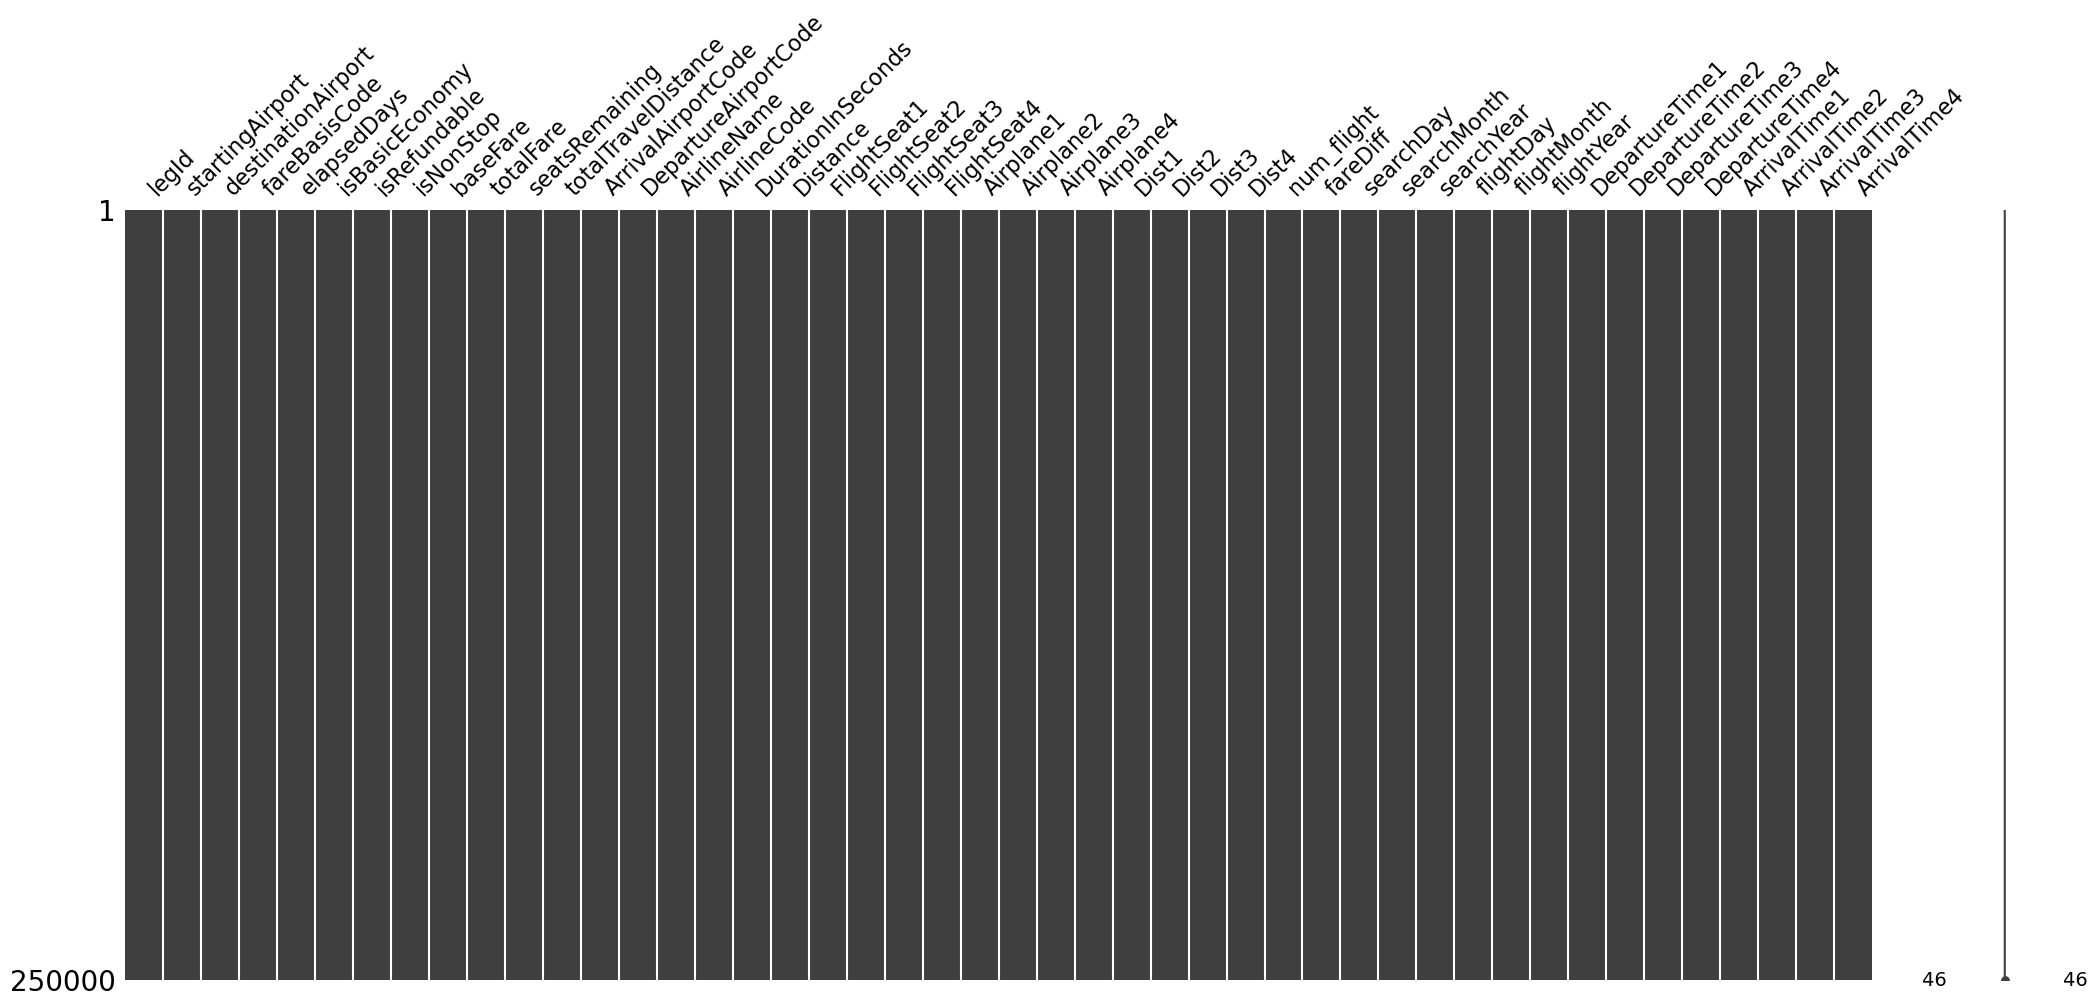

In [845]:
msno.matrix(new_flight_df)

All missing entiries have been filled in, lets start the encoding process. So we have the more basic columns, these three columns are binary columns and can be encoded with dummy encoding simply.

In [846]:
cols_to_dummy = ['isBasicEconomy', 'isRefundable', 'isNonStop']

#Create a list for the new column names
prefix = cols_to_dummy[:]

#Convert the three columns to binary representation
new_flight_df = pd.get_dummies(new_flight_df, prefix=prefix, prefix_sep='_', columns=cols_to_dummy, drop_first=True)

In [847]:
new_flight_df

,legId,startingAirport,destinationAirport,fareBasisCode,elapsedDays,baseFare,totalFare,seatsRemaining,totalTravelDistance,ArrivalAirportCode,...,DepartureTime2,DepartureTime3,DepartureTime4,ArrivalTime1,ArrivalTime2,ArrivalTime3,ArrivalTime4,isBasicEconomy_True,isRefundable_True,isNonStop_True
0,9ca0e81111c683bec1012473feefd28f,ATL,BOS,LA0NX0MC,0.0,217.67,248.6,9.0,947.0,BOS,...,Missing,Missing,Missing,15:26,Missing,Missing,Missing,0,0,1
1,98685953630e772a098941b71906592b,ATL,BOS,LA0NX0MC,0.0,217.67,248.6,4.0,947.0,BOS,...,Missing,Missing,Missing,09:00,Missing,Missing,Missing,0,0,1
2,98d90cbc32bfbb05c2fc32897c7c1087,ATL,BOS,LA0NX0MC,0.0,217.67,248.6,9.0,947.0,BOS,...,Missing,Missing,Missing,14:05,Missing,Missing,Missing,0,0,1
3,969a269d38eae583f455486fa90877b4,ATL,BOS,LA0NX0MC,0.0,217.67,248.6,8.0,947.0,BOS,...,Missing,Missing,Missing,16:31,Missing,Missing,Missing,0,0,1
4,980370cf27c89b40d2833a1d5afc9751,ATL,BOS,LA0NX0MC,0.0,217.67,248.6,9.0,947.0,BOS,...,Missing,Missing,Missing,12:33,Missing,Missing,Missing,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,fb30e589338583670450e50a755b7d0f,SFO,DFW,OH4OZVMN,0.0,365.58,416.6,7.0,2342.0,SEA||DFW,...,17:55,Missing,Missing,15:09,23:49,Missing,Missing,0,0,0
249996,fb94338f3d30a46bc825993ba3c3bcc1,SFO,DFW,OH4OZVMN,0.0,365.58,416.6,7.0,2342.0,SEA||DFW,...,17:55,Missing,Missing,14:14,23:49,Missing,Missing,0,0,0
249997,93f1cfb0e12005374581aa5cfd7c284e,SFO,DFW,QAA0OKEN,0.0,393.49,446.6,7.0,1604.0,DEN||DFW,...,20:40,Missing,Missing,19:40,23:35,Missing,Missing,0,0,0
249998,a0f75170e4e4589f6248434c8ea8e012,SFO,DFW,K7AKZNN1,0.0,413.02,458.6,7.0,1468.0,DFW,...,Missing,Missing,Missing,13:33,Missing,Missing,Missing,0,0,1


In [848]:
#Now for the encoding the other columns, I exclude the three columns we've already encoded; however, I will also
#exclude the baseFare, totalFare, and fareDiff columns as they're not categorical information. 

#Create a list of features to encode
features = list(new_flight_df.columns)

#Remove these features from the features list
features.remove("isBasicEconomy_True")
features.remove("isRefundable_True")
features.remove("isNonStop_True")
features.remove("baseFare")
features.remove("totalFare")
features.remove("fareDiff")

In [849]:
#Convert all of these features and data into strings 
#for feature in features:
#    new_flight_df[feature] = new_flight_df[feature].map(str)

In [850]:
#new_flight_df.dtypes

In [851]:
#encoder = LabelEncoder()
#for feature in features:
#    new_flight_df[feature] = encoder.fit_transform(new_flight_df[feature])

In [852]:
#for feature in features:
#    encoder = BinaryEncoder(cols=feature)
#    new_flight_df[feature] = encoder.fit_transform(new_flight_df)

In [853]:
encoder = BinaryEncoder(cols=features)
new_flight_df = encoder.fit_transform(new_flight_df)
new_flight_df

,legId_0,legId_1,legId_2,legId_3,legId_4,legId_5,legId_6,legId_7,legId_8,legId_9,...,ArrivalTime4_0,ArrivalTime4_1,ArrivalTime4_2,ArrivalTime4_3,ArrivalTime4_4,ArrivalTime4_5,ArrivalTime4_6,isBasicEconomy_True,isRefundable_True,isNonStop_True
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,1,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
249996,1,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
249997,1,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
249998,1,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [854]:
new_flight_df.head()

,legId_0,legId_1,legId_2,legId_3,legId_4,legId_5,legId_6,legId_7,legId_8,legId_9,...,ArrivalTime4_0,ArrivalTime4_1,ArrivalTime4_2,ArrivalTime4_3,ArrivalTime4_4,ArrivalTime4_5,ArrivalTime4_6,isBasicEconomy_True,isRefundable_True,isNonStop_True
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [855]:
new_flight_df.dtypes

legId_0                int64
legId_1                int64
legId_2                int64
legId_3                int64
legId_4                int64
                       ...  
ArrivalTime4_5         int64
ArrivalTime4_6         int64
isBasicEconomy_True    uint8
isRefundable_True      uint8
isNonStop_True         uint8
Length: 289, dtype: object

The problem we will be trying to solve is predicting the price, so this will be a regression problem. Specifically, the totalFare is the feature we're trying to predict, so lets create our X and y.

In [856]:
X = new_flight_df.drop(['totalFare'],axis=1)
y = new_flight_df['totalFare']

In [857]:
y

0         248.6
1         248.6
2         248.6
3         248.6
4         248.6
          ...  
249995    416.6
249996    416.6
249997    446.6
249998    458.6
249999    567.6
Name: totalFare, Length: 250000, dtype: float64

In [858]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [859]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_fit = scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [860]:
model1 = Ridge()
folds = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(model1, X_train_scaled, y_train, scoring='r2', cv=folds)
scores

array([1., 1., 1., 1., 1.])

In [861]:
model2 = Lasso()
folds = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(model2, X_train_scaled, y_train, scoring='r2', cv=folds)
scores

array([0.9999774 , 0.99997774, 0.9999777 , 0.99997764, 0.99997733])

In [862]:
model3 = ElasticNet()
folds = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(model3, X_train_scaled, y_train, scoring='r2', cv=folds)
scores

array([0.92224736, 0.92075579, 0.92028512, 0.91941081, 0.92355359])

Well I would like to say all three of these models performed very well, I feel like they're definitely overfitting. However, I have been unable to figure out as to why? Been trying to tinker for days without finding out the problem and a potential solution. 